In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

2024-10-10 16:08:07.685950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 16:08:08.305103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
num_epochs = 150
batch_size = 256
learning_rate = 0.001

In [3]:
AS_dataset = pd.read_csv('./Arbitrary_Single_band_Coupler_Phase_Shift.csv', encoding='utf-8').sample(frac=1).reset_index(drop=True)
full_X = AS_dataset.loc[:,'freq':'L4'].to_numpy(dtype = np.float32)
full_y = AS_dataset.loc[:,'S11r':'S41i'].to_numpy(dtype = np.float32)
X_train, X_vali, y_train, y_vali = train_test_split(full_X, full_y, test_size=0.05, random_state=0)
dataset_train = tf.data.Dataset.from_tensor_slices((full_X, full_y))
dataset_train = dataset_train.shuffle(buffer_size=full_X.shape[0])
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

2024-10-10 16:08:12.256574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9604 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2024-10-10 16:08:12.257100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9621 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


In [4]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=512, activation=tf.nn.leaky_relu)
        self.dense2 = tf.keras.layers.Dense(units=1024, activation=tf.nn.leaky_relu)
        self.dense3 = tf.keras.layers.Dense(units=512, activation=tf.nn.leaky_relu)
        self.dense4 = tf.keras.layers.Dense(units=256, activation=tf.nn.leaky_relu)
        self.dense5 = tf.keras.layers.Dense(units=8)
    
#     @tf.function
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        output = self.dense5(x)
        return output

In [5]:
model = MLP()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

GT_struct = tf.constant([2.27248, 2.52657, 1.06926, 3.83355, 1.92307, 1.74249, 1.37051,  1.52846,  17.2486, 66.9054, 18.5276, 50.3882])
GT_X = tf.concat([tf.constant([[2.4], [2.5], [2.6]]), tf.repeat([GT_struct], 3, axis=0)], axis=1)
GT_S = tf.constant([[0.016, 0.075, 0.743, 0.343, 0.496, -0.185, -0.147, 0.005],
[-0.021, 0.003, 0.827, 0.089, 0.414, -0.333, -0.026, -0.018],
[-0.093, -0.046, 0.802, -0.177, 0.281, -0.444, 0.052, -0.109]])

2024-10-10 16:08:17.483818: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d08f5908c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-10 16:08:17.483843: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-10-10 16:08:17.483850: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-10-10 16:08:17.500523: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-10 16:08:18.942908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-10-10 16:08:19.086863: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


epoch:0
train mse:0.08103764057159424 rmse:0.2846710979938507 mae:0.2262965589761734 r2:0.3254804015159607 EC:0.4024909734725952
vali mse:0.08506055921316147 rmse:0.2916514277458191 mae:0.23373106122016907 r2:0.29543864727020264
GT mse:0.16420511901378632 rmse:0.4052222967147827 mae:0.3070621192455292 r2:-0.48226404190063477
epoch:10
train mse:0.042510081082582474 rmse:0.20617972314357758 mae:0.16103972494602203 r2:0.6462104320526123 EC:0.6232501268386841
vali mse:0.0448126345872879 rmse:0.21168994903564453 mae:0.16563336551189423 r2:0.6288144588470459
GT mse:0.0653015598654747 rmse:0.25554171204566956 mae:0.20967181026935577 r2:0.41052907705307007
epoch:20
train mse:0.03215118870139122 rmse:0.17930753529071808 mae:0.13720694184303284 r2:0.7319283485412598 EC:0.6972829103469849
vali mse:0.03689984232187271 rmse:0.19209331274032593 mae:0.1484472155570984 r2:0.6943565607070923
GT mse:0.0667194202542305 rmse:0.2583010196685791 mae:0.21080410480499268 r2:0.39773017168045044
epoch:30
train 

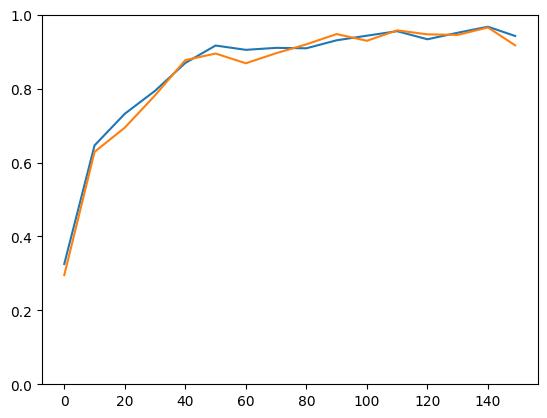

In [6]:
showX = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 149]
showY1 = []
showY2 = []

for epoch_index in range(num_epochs):
    for X, y in dataset_train:
        with tf.GradientTape() as tape:
            y_pred = model(X)
            tr_mse = tf.reduce_mean(tf.square(y_pred - y))
        grads = tape.gradient(tr_mse, model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    if epoch_index % 10 == 0 or epoch_index == num_epochs - 1:
        tr_EC = tf.reduce_mean(tf.reduce_sum(tf.square(y_pred), axis=1))
        tr_rmse = tf.sqrt(tr_mse)
        tr_mae = tf.reduce_mean(tf.abs(y_pred - y))
        tr_r2 = 1 - tf.reduce_sum(tf.square(y_pred - y)) / tf.reduce_sum(tf.square(y - tf.reduce_mean(y)))
        print("epoch:{}".format(epoch_index))
        print("train mse:{} rmse:{} mae:{} r2:{} EC:{}".format(tr_mse, tr_rmse, tr_mae, tr_r2, tr_EC))
        y_v_p = model(X_vali)
        va_mse = tf.reduce_mean(tf.square(y_v_p - y_vali))
        va_rmse = tf.sqrt(va_mse)
        va_mae = tf.reduce_mean(tf.abs(y_v_p - y_vali))
        va_r2 = 1 - tf.reduce_sum(tf.square(y_v_p - y_vali)) / tf.reduce_sum(tf.square(y_vali - tf.reduce_mean(y_vali)))
        print("vali mse:{} rmse:{} mae:{} r2:{}".format(va_mse, va_rmse, va_mae, va_r2))
        GT_y = model(GT_X)
        # GT_loss = loss_func(GT_y[0:1], GT_y[1:2], GT_y[2:3], GT_y[3:4], GT_y[4:5], GT_y[5:6]) + loss_func(GT_y[6:7], GT_y[7:8], GT_y[8:9], GT_y[9:10], GT_y[10:11], GT_y[11:12])
        GT_mse = tf.reduce_mean(tf.square(GT_y - GT_S))
        GT_rmse = tf.sqrt(GT_mse)
        GT_mae = tf.reduce_mean(tf.abs(GT_y - GT_S))
        GT_r2 = 1 - tf.reduce_sum(tf.square(GT_y - GT_S)) / tf.reduce_sum(tf.square(GT_S - tf.reduce_mean(GT_S)))
        print("GT mse:{} rmse:{} mae:{} r2:{}".format(GT_mse, GT_rmse, GT_mae, GT_r2))
        showY1.append(tr_r2)
        showY2.append(va_r2)
plt.plot(showX, showY1)
plt.plot(showX, showY2)
plt.ylim(0, 1)
plt.show()

In [7]:
tf.saved_model.save(model, './models')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [8]:
model = tf.saved_model.load('./models')

In [9]:
def dgn_obj(s_para, dis = False):
    E = tf.square(s_para)
    E11 = E[:,0] + E[:,1]
    E21 = E[:,2] + E[:,3]
    E31 = E[:,4] + E[:,5]
    E41 = E[:,6] + E[:,7]
    l1 = E11 - E21 - E31 + E41
    l2 = tf.abs(E21 / (E31 + E21) - 0.7)
    l3 = tf.abs(tf.math.atan2(s_para[:,3], s_para[:,2]) - tf.math.atan2(s_para[:,5], s_para[:,4]) - np.pi / 4)
    l4 = tf.abs(tf.reduce_sum(E, axis=1) - 1)
    loss = l1 + l2 + l3 + l4
    if dis == True:
        print("l1", l1.numpy()[0])
        print("l2", l2.numpy()[0])
        print("l3", l3.numpy()[0])
        print("l4", l4.numpy()[0])
    return loss
def loss_func(s1, s2, s3, dis = False):
    # 21和31的方差
    var = tf.reduce_sum(tf.nn.moments(tf.stack([s1, s2, s3], axis=1), [1])[1][:, 2: 6], axis=-1)
    if dis == True:
        print("var", var.numpy()[0])
    return var + dgn_obj(s1, dis) + dgn_obj(s2, dis) + dgn_obj(s3, dis)

In [10]:
num_nodes = 10000
num_node_epochs = 1000

In [11]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

mmin = np.min(full_X[: , 1: ], axis=0)
mmax = np.max(full_X[: , 1: ], axis=0)

structure = tf.Variable(np.random.uniform(mmin, mmax, (num_nodes, 12)), dtype=tf.float32)

freq1 = tf.ones([num_nodes, 1]) * 2.4
freq2 = tf.ones([num_nodes, 1]) * 2.5
freq3 = tf.ones([num_nodes, 1]) * 2.6

In [12]:
bestLoss = 10
bestStructure = 0

In [13]:
def check(structure):
    # inva_place1 = tf.where(structure[:,:8] < 1)
    inva_place1 = tf.where(tf.logical_or(structure[:,:8] < 1, structure[:,:8] > 5))
    structure = tf.tensor_scatter_nd_update(structure, [inva_place1], [np.random.uniform(mmin[inva_place1[:,1]], mmax[inva_place1[:,1]], (inva_place1.shape[0]))])
    
    # inva_place2 = tf.where(structure[:,8:] < 4) + [0, 8]
    inva_place2 = tf.where(tf.logical_or(structure[:,8:] < 4, structure[:,8:] > 100)) + [0, 8]
    structure = tf.tensor_scatter_nd_update(structure, [inva_place2], [np.random.uniform(mmin[inva_place2[:,1]], mmax[inva_place2[:,1]], (inva_place2.shape[0]))])
    
    return tf.Variable(structure)
    
    # structure[j] = tf.Variable(tf.tensor_scatter_nd_update(structure[j], [nega_place], [np.random.uniform(0, 1, (nega_place.shape[0]))]))

In [ ]:
for i in range(num_node_epochs):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch(structure)
        y_pred1 = model(tf.concat([freq1, structure], axis = 1))
        y_pred2 = model(tf.concat([freq2, structure], axis = 1))
        y_pred3 = model(tf.concat([freq3, structure], axis = 1))
        loss = loss_func(y_pred1, y_pred2, y_pred3)
    minLoss = tf.reduce_min(loss).numpy()
    minIndex = tf.argmin(loss).numpy()
    minS = structure[minIndex].numpy()
    grads = tape.gradient(loss, structure)
    opt.apply_gradients(grads_and_vars=zip([grads], [structure]))
    structure = check(structure)
    if minLoss < bestLoss:
        bestLoss = minLoss
        bestStructure = minS
        # bestStructure = data_loader.mmX.inverse_transform([minS[0]])[0]
        print(minIndex)
        print(i, bestLoss)
        print(" ".join(map(str, bestStructure)))
        print()

4976
0 -1.1958429
3.1547213 2.7700534 1.0721438 1.8026716 1.3130448 3.8171675 1.530402 1.1869775 17.34897 53.286995 19.726974 46.284256

4976
1 -1.21613
3.1647213 2.7800531 1.0621437 1.7926714 1.3230449 3.8071675 1.5204017 1.1769774 17.358969 53.296993 19.716974 46.274258

4976
2 -1.2309558
3.1721625 2.7874942 1.0547024 1.7852302 1.3304862 3.7997262 1.5129603 1.169536 17.36641 53.304436 19.709534 46.266815

4976
3 -1.2439439
3.1785505 2.793882 1.0483143 1.7788421 1.3368742 3.7933383 1.5065722 1.1631479 17.372797 53.310825 19.703146 46.260426

4976
4 -1.2560408
3.1843617 2.7996926 1.0425031 1.7730309 1.3426855 3.787527 1.500761 1.1573367 17.378607 53.316635 19.697334 46.254616

4976
5 -1.2674837
3.1898165 2.8051474 1.0370482 1.7675761 1.3481402 3.7820723 1.4953061 1.1518818 17.384062 53.32209 19.69188 46.24916

4976
6 -1.27813
3.1950376 2.8103683 1.0318271 1.762355 1.3533614 3.7768512 1.490085 1.1466607 17.389282 53.327312 19.686659 46.24394

4976
7 -1.288049
3.2001011 2.8154318 1.02676

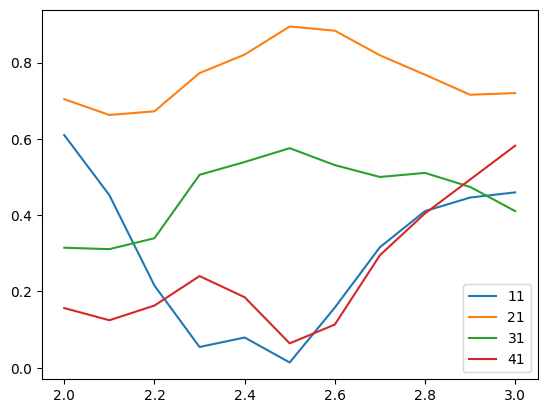

In [14]:
# 画图
fig_freq = tf.linspace(2.0, 3.0, 11)
fig_x = tf.concat([tf.reshape(fig_freq, (-1, 1)), tf.tile([bestStructure], [11, 1])], axis=-1)
fig_y = model(fig_x)
E = tf.square(fig_y)
M11 = tf.sqrt(E[:,0] + E[:,1])
M21 = tf.sqrt(E[:,2] + E[:,3])
M31 = tf.sqrt(E[:,4] + E[:,5])
M41 = tf.sqrt(E[:,6] + E[:,7])
plt.figure()
plt.plot(fig_freq, M11, label='11')
plt.plot(fig_freq, M21, label='21')
plt.plot(fig_freq, M31, label='31')
plt.plot(fig_freq, M41, label='41')
plt.legend()
plt.show()

In [94]:
# S4P
l = fig_y.numpy().tolist()
for i in range(len(l)):
    print(round(fig_freq.numpy()[i]*10,0) / 10, end="\t")
    print(l[i][0], l[i][1], "0\t" * 6, sep="\t")
    print(l[i][2], l[i][3], "0\t" * 6, sep="\t")
    print(l[i][4], l[i][5], "0\t" * 6, sep="\t")
    print(l[i][6], l[i][7], "0\t" * 6, sep="\t")

2.0	0.06878483295440674	-0.09469611942768097	0	0	0	0	0	0	
0.6565452814102173	0.15796920657157898	0	0	0	0	0	0	
0.5141607522964478	-0.0319935642182827	0	0	0	0	0	0	
-0.282743901014328	0.06157451122999191	0	0	0	0	0	0	
2.1	-0.11486548185348511	0.1363009661436081	0	0	0	0	0	0	
0.6606279611587524	0.15550482273101807	0	0	0	0	0	0	
0.49992695450782776	-0.09804826229810715	0	0	0	0	0	0	
-0.09764247387647629	-0.14554116129875183	0	0	0	0	0	0	
2.2	-0.1282205581665039	0.2114057093858719	0	0	0	0	0	0	
0.6647675037384033	0.24070629477500916	0	0	0	0	0	0	
0.49838998913764954	-0.02534870244562626	0	0	0	0	0	0	
-0.048691701143980026	-0.1890539526939392	0	0	0	0	0	0	
2.3	-0.07139019668102264	0.16198192536830902	0	0	0	0	0	0	
0.7206422090530396	0.3463093936443329	0	0	0	0	0	0	
0.5143819451332092	-0.05189746245741844	0	0	0	0	0	0	
-0.06881459057331085	-0.08046060055494308	0	0	0	0	0	0	
2.4	0.023850977420806885	0.14300239086151123	0	0	0	0	0	0	
0.8025943040847778	0.43086329102516174	0	0	0	0	0	0	
0.5561860203742981	-0.16

In [16]:
MP_X = tf.concat([tf.constant([[2.4],[2.5],[2.6]]), tf.tile([bestStructure], [3, 1])], axis=-1)
GT_X = tf.concat([tf.constant([[2.4],[2.5],[2.6]]), tf.tile([GT_struct], [3, 1])], axis=-1)
MP_y = model(MP_X)
GT_y = model(GT_X)
print("MP")
MP_loss = loss_func(MP_y[0:1], MP_y[1:2], MP_y[2:3], dis=True)
print(MP_loss)
print("GT")
GT_loss = loss_func(GT_y[0:1], GT_y[1:2], GT_y[2:3], dis=True)
print(GT_loss)

MP
var 0.017137764
l1 -1.0141783
l2 0.016935647
l3 0.021631777
l4 0.020062208
l1 -1.0808041
l2 0.005261004
l3 0.00023454428
l4 0.087109804
l1 -1.0872607
l2 0.00043296814
l3 0.011232913
l4 0.10975337
tf.Tensor([-2.8924513], shape=(1,), dtype=float32)
GT
var 0.08208049
l1 -0.9188244
l2 0.008790374
l3 0.04300648
l4 0.071036816
l1 -1.053266
l2 0.079873264
l3 0.11761063
l4 0.05966711
l1 -0.923655
l2 0.042232215
l3 0.28020114
l4 0.04791212
tf.Tensor([-2.0633347], shape=(1,), dtype=float32)


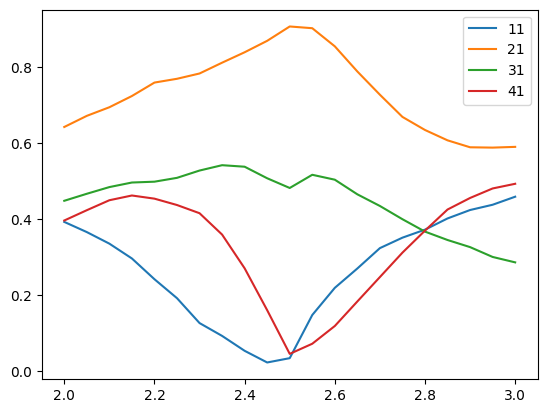

In [15]:
# 画图
fig_freq = tf.linspace(2.0, 3.0, 21)
fig_x = tf.concat([tf.reshape(fig_freq, (-1, 1)), tf.tile([GT_struct], [21, 1])], axis=-1)
fig_y = model(fig_x)
E = tf.square(fig_y)
M11 = tf.sqrt(E[:,0] + E[:,1])
M21 = tf.sqrt(E[:,2] + E[:,3])
M31 = tf.sqrt(E[:,4] + E[:,5])
M41 = tf.sqrt(E[:,6] + E[:,7])
plt.figure()
plt.plot(fig_freq, M11, label='11')
plt.plot(fig_freq, M21, label='21')
plt.plot(fig_freq, M31, label='31')
plt.plot(fig_freq, M41, label='41')
plt.legend()
plt.show()